In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import StratifiedShuffleSplit

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [8]:
def encode(train, test):
    le = LabelEncoder().fit(train.species) 
    labels = le.transform(train.species)           # encode species strings
    classes = list(le.classes_)                    # save column names for submission
    test_ids = test.id                             # save test ids for submission
    
    train = train.drop(['species', 'id'], axis=1)  
    test = test.drop(['id'], axis=1)
    
    return train, labels, test, test_ids, classes

train, labels, test, test_ids, classes = encode(train, test)
train.head(1)

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,...,0.007812,0.0,0.00293,0.00293,0.035156,0.0,0.0,0.004883,0.0,0.025391


In [9]:
sss = StratifiedShuffleSplit(labels,10,test_size=0.2 , random_state=23)
for train_index, test_index in sss:
    X_train , X_test = train.values[train_index],train.values[test_index]
    y_train, y_test = labels[train_index], labels[test_index]    

In [15]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

log_cols = ['Classifier', 'Accuracy','Log Loss']
log = pd.DataFrame(columns = log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: %s"%acc)
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: %s" %ll)
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)   

KNeighborsClassifier
****Results****
Accuracy: 0.888888888889
Log Loss: 1.57550751299
SVC
****Results****
Accuracy: 0.818181818182
Log Loss: 4.59525853504
NuSVC
****Results****
Accuracy: 0.883838383838
Log Loss: 2.48491451998
DecisionTreeClassifier
****Results****
Accuracy: 0.646464646465
Log Loss: 12.2106785235
RandomForestClassifier
****Results****
Accuracy: 0.89898989899
Log Loss: 1.2734224129
AdaBoostClassifier
****Results****
Accuracy: 0.0454545454545
Log Loss: 4.20721577649
GradientBoostingClassifier
****Results****
Accuracy: 0.565656565657
Log Loss: 2.50915888225
GaussianNB
****Results****
Accuracy: 0.570707070707
Log Loss: 14.8272524928
LinearDiscriminantAnalysis
****Results****
Accuracy: 0.979797979798
Log Loss: 0.930197776314
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 0.040404040404
Log Loss: 33.1432702779
                      Classifier   Accuracy   Log Loss
0           KNeighborsClassifier  88.888889   1.575508
0                            SVC  81.818182   4.5

C:\Users\gene11117\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:455: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\gene11117\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\gene11117\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [18]:
log_entry

,Classifier,Accuracy,Log Loss
0,QuadraticDiscriminantAnalysis,4.040404,33.14327


In [17]:
log

,Classifier,Accuracy,Log Loss
0,KNeighborsClassifier,88.888889,1.575508
0,SVC,81.818182,4.595259
0,NuSVC,88.383838,2.484915
0,DecisionTreeClassifier,64.646465,12.210679
0,RandomForestClassifier,89.898990,1.273422
0,AdaBoostClassifier,4.545455,4.207216
0,GradientBoostingClassifier,56.565657,2.509159
0,GaussianNB,57.070707,14.827252
0,LinearDiscriminantAnalysis,97.979798,0.930198
0,QuadraticDiscriminantAnalysis,4.040404,33.143270


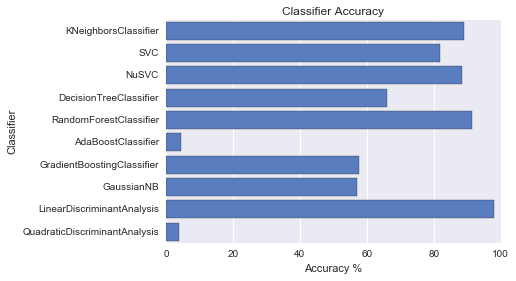

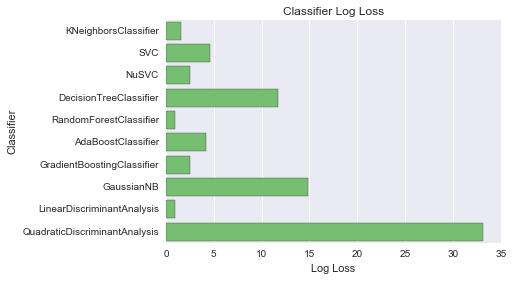

In [11]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()